<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/01_Deep_Learning_regression_with_tf_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction to Neural Network with tf
We are going to predict the number using neural network

In [ ]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


##Creating Data to view and fit

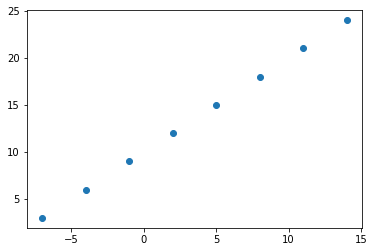

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Creating Features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#Creating labels/outputs
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
#visualize it
plt.scatter(X,y)

In [ ]:
#So this is the pattern which neural network should have to learn
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output shapes

In [ ]:
#Creating demo tensor for out house price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
#Turn our numpy array into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
X[0].ndim

0

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

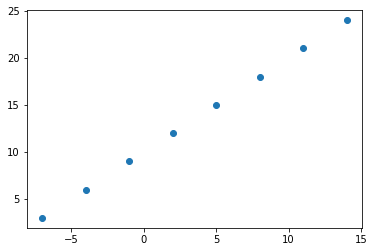

In [ ]:
plt.scatter(X,y)

##Steps in Modeling with tensorflow
1. **Creating a Model**, define input layer, output layer and hidden layer
2. **Compiling a Model**- define a loss function (this is a function which tells our model how wrong it is) and optimizer ( which tell how to improve patterns in learning) and evaluation matrice (to tell the performance of model)
3. **Fitting th model** (it will find the pattern between X and Y (features and labels)

In [ ]:
# #optionally first layer can recieve input shape argument
# #we can als use this method for creating sequential method
# model=tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
# #Afterward we d automatic shape inference
# model.add(tf.keras.layers.Dense(4))

In [ ]:
X.dtype,y.dtype,X.ndim,y.ndim

(tf.float32, tf.float32, 1, 1)

In [ ]:
# X=tf.reshape(X,(2,4))
# y=tf.reshape(y,(2,4))
# X.shape,y.shape
# pylint --generate-rcfile
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#set random seed
tf.random.set_seed(42)
#creating model using sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,)) #this is the output layer
])
#Compile the model
model.compile(
    loss=tf.keras.losses.mae,#mean absolute error
    # loss="mae"
              optimizer=tf.keras.optimizers.SGD(),#stochastic gradient decent
              metrics=["mae"]
              )
#fitting the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 799ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#predicting values
y_predict=model.predict([17.0])
y_predict

array([[12.716021]], dtype=float32)

In [ ]:
#this should be predicted output
y_predict+15

array([[27.71602]], dtype=float32)

##Improving Model
We can improve the model using these steps
1. **Create the model**: Here we will add more layers in model, increase number of hidden layers, changing activation function in hidden layer
2. **Compiling the Model**: Here we can change the optimization function or learnign rate
3. **Fitting the Model**: Here we can add more trainning data in  the model and increase the increase the size of epochs in while fitting the data

In [ ]:
#let's rebuild the model
#create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])
#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
#fitting the model
model.fit(X,y,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 289ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
#Again Improving Model to increase the accuracy of prediction
#Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None,input_shape=(1,)),
    tf.keras.layers.Dense(1,input_shape=(1,))
])
#Compile the Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics="mae"
              )
#fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 503ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - 

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Predict the number
model.predict([17.0])

array([[26.58353]], dtype=float32)

##Evaluating the Model
There is too typical workflow you have to go through which is in repeating steps<br/>
`build the model----fit the model----evalute the model---pull the model.....`

In evaluating model we have to visualize it<br/>
`vizualize----vizualize.....vizualize`

**We will visualize these things**<br/>
1. Data (How our data is look like)
2. Model (How our model look like)
3. Training (How trainning is performing on data)
4. Predictions (How predictions we are getting)

In [ ]:
#Now let's try the model with bigger data set
X=tf.range(-100,100,4) #showing every number between -100 to 100 with the gap of 4 numbers
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

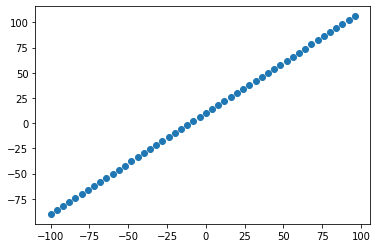

In [ ]:
#Now we will plot the data using matplotlib.pyplot
plt.scatter(X,y) #scatter is more good graph than plot

##Normally we split the Data set into three sets
* **Trainning set:** This is the set we use to train the data and this is about 70 to 80% data of your data set
* **Validation set:** this we use to validate is our model giving us right output or not with this set (to check is model get tune with this data or not). This is about 10 to 15% of your data (Practice Exam)
* **Test Set:** this we use to test the model. This is about 10 to 15% of our data (Final Exam)


In [ ]:
#Firstly, Checking length How much data we have
len(X)

50

In [ ]:
#Now split the data
X_train=X[:40] #this is 80% of the total data
y_train=y[:40]
X_test=X[40:]#this is the remainning 20% of the total data
y_test=y[40:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

###Again Visualize data because Data is split now


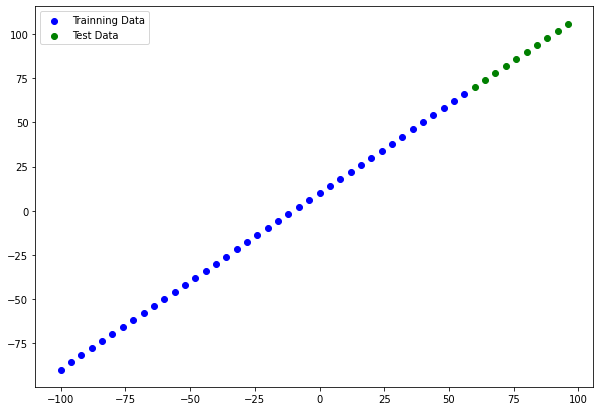

In [ ]:
plt.figure(figsize=(10,7))
#plot trainning data in blue
plt.scatter(X_train,y_train,c="b",label="Trainning Data")
#plot test data in green
plt.scatter(X_test,y_test,c="g",label="Test Data")
plt.legend(); #to show labels in graph

In [ ]:
X_train.shape

TensorShape([40])

In [ ]:
#Now Creating Neural Network Again
tf.random.set_seed(42)
#Creating Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,),name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")
#Compiling Model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(0.01),metrics="mae")
#fit model
model.fit(X_train,y_train,epochs=100,verbose=0) #if value of verbose will be one then we can see the progress below for fitting model??

In [ ]:
X_test,y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
model.predict([60])

array([[72.42797]], dtype=float32)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total Params: total number parameters in the model
* Trainable Parameters: These are those parameters which can change during trainning (weights are biase are trainable parameters)
* Non-trainable Parameters: thses are parameters which do not update while trainning (learning rate is non trainable parameters)

###Visualize Model

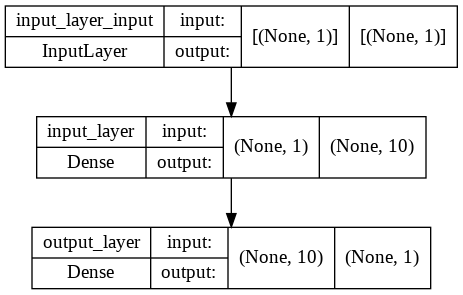

In [ ]:
#plotting model
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

###Visualize Prediction
Now we visualize prediction, with the labels of y_pred and y_act(y_test)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[ 72.42797 ],
       [ 76.58641 ],
       [ 80.74485 ],
       [ 84.90329 ],
       [ 89.06173 ],
       [ 93.22018 ],
       [ 97.378624],
       [101.537056],
       [105.695496],
       [109.853935]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

📓 **Note:** It is too good to make reusable functionality into function

In [ ]:
#creating dunction
def plot_prediction(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,prediction=y_pred):
  """ploting training,test data and comparing with predictions"""
  plt.figure(figsize=(10,7))
  #plotting train data in blue
  plt.scatter(train_data,train_labels,c='b',label="training_data")
  #plotting test data in green
  plt.scatter(test_data,test_labels,c='g',label="test_data")
  #plotting predictions
  plt.scatter(test_data,prediction,c="r",label="predictions")
  plt.legend();

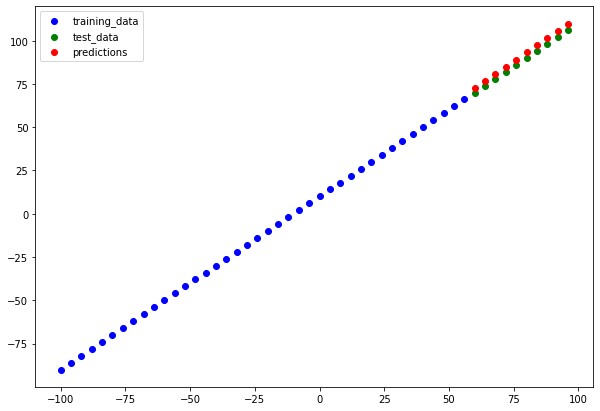

In [ ]:
plot_prediction()

##Evaluating Model
Evaluation matrix ar different according to the problem. Now we are working on regression problem so we can evaluate out model using
* **MAE** Mean Absolute error on average how wrong our model is predicting error
* **MSE** Mean Square Error means square the average error

In [ ]:
#Evaluating Matrix in test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 98ms/step - loss: 3.1410 - mae: 3.1410


[3.1409544944763184, 3.1409544944763184]

In [ ]:
#Calculating Mean Absolute Error
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.057623, 13.248154, 11.30206 , 10.219342, 10.      , 10.644035,
       12.151449, 14.522234, 17.756397, 21.853935], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 72.42797 ],
       [ 76.58641 ],
       [ 80.74485 ],
       [ 84.90329 ],
       [ 89.06173 ],
       [ 93.22018 ],
       [ 97.378624],
       [101.537056],
       [105.695496],
       [109.853935]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Now removing extra dimension from y_pred so that both of the tensor has same dimensions
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 72.42797 ,  76.58641 ,  80.74485 ,  84.90329 ,  89.06173 ,
        93.22018 ,  97.378624, 101.537056, 105.695496, 109.853935],
      dtype=float32)>

In [ ]:
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1409538>

In [ ]:
#Now calculating mean square error
mse=tf.metrics.mean_squared_error(y_true=y_test,
                                 y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.072696>

In [ ]:
#Making reusable functions for MSE and MAE
def MSE(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
def MAE(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

##Running Expreriments to improve model

We can improve our model by following steps

1. Add more data and give the model more chances to get good patterns
2. Add more hidden layers to make model bigger
3. Train your model for longer time

lets do three models experiments

1. 1 layer 100 epochs
2. 2 layers 100 epochs
3. 2 layers 500 epochs

In [ ]:
#Creating model 1
tf.random.set_seed(42)
#create model
model_1=tf.keras.Sequential(
    tf.keras.layers.Dense(1,input_shape=(1,))
)
#compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae"
                )
#fitting mdoel
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

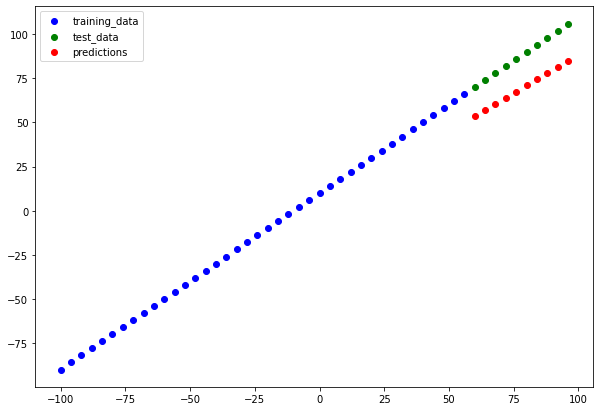

In [ ]:
#plotting prediction using function which we make before
y_pred_1=model_1.predict(X_test)
plot_prediction(prediction=y_pred_1)

In [ ]:
#Calculating evaluation metrics
mae_1=MAE(y_test,y_pred_1)
mse_1=MSE(y_test,y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

###Creating model 2
model_2 with 2 layers and 100 epochs

In [ ]:
#setting random seed
tf.random.set_seed(42)
#create model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(1,input_shape=(1,))
])
#compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mse"
                )
#fitting model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

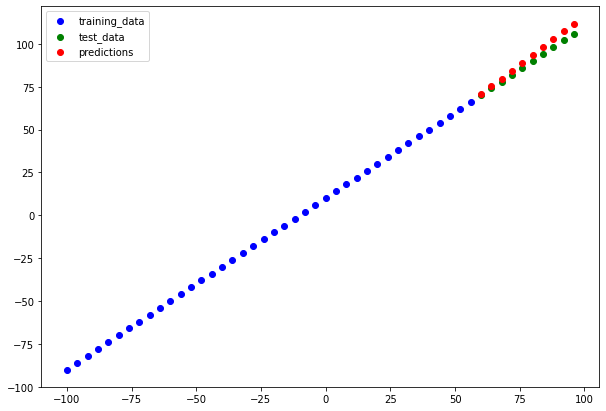

In [ ]:
#Now making plot preiction in model_2
y_pred_2=model_2.predict(X_test)
plot_prediction(prediction=y_pred_2)

In [ ]:
#Now evaluating model using evaluation metrics
mae_2=MAE(y_test,y_pred_2)
mse_2=MSE(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Now Building Model 3**

using 2 Dense layers and 500 epochs

In [ ]:
#setting seed
tf.random.set_seed(42)
#creating model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(1,input_shape=(1,))
])
#compiling model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mse"
                )
#fitting model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/500
2/2 [=========================

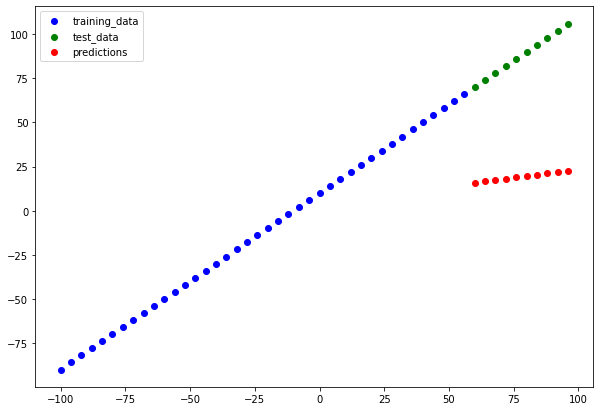

In [ ]:
#Visualizing Predictions
y_pred_3=model_3.predict(X_test)
plot_prediction(prediction=y_pred_3)

In [ ]:
#evaluating models
mse_3=MSE(y_test,y_pred_3)
mae_3=MAE(y_test,y_pred_3)
mse_3,mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.713615>)

📓 **Note:** Always start with small experiments(models or data) and then increase the scale.

##Comparing the results

In [ ]:
#Now comparing the models
import pandas as pd
model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]
               ]
total_result=pd.DataFrame(model_results,columns=["model","mae","mse"])
total_result

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
#Now model_2 showing some good results
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


📓 **Note:** One of the things is you have to reduce the time of the experiments. You will get more solutions as you run more experiments.

##Tracking your experiments
this is very good habit to track the experiments for this purpose we have tools to get help

* TensorBoard- a component of tensorflow library to get help in tracking experiments of models (Visualizing toolkit)

* Weights and Biase an external tool for ML to get help in tracking

##Saving our Model

saving our model help us to use the models outside from the colab like web applications etc

There are two formats to save teh model

* The SavedModel Format
* The HDF5 Format

In [ ]:
#saving model using SavedModel Format
#Mostly we use this format
model_2.save("Best_Model_SavedModel_Format")

In [ ]:
#saving model using HDF5 Format
model_2.save("Best_Model_SavedModel_Format.h5")

##Loading the Model

In [ ]:
#Loading from Saved Model Format
loaded_SavedModel_Format=tf.keras.models.load_model("Best_Model_SavedModel_Format")
loaded_SavedModel_Format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m2=loaded_SavedModel_Format
m2

In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Comparing model 2 predictions with loaded Model
model_2_preds=model_2.predict(X_test)
m2_preds=m2.predict(X_test)
model_2_preds==m2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#Now loading h5 format model
loaded_h5_model=tf.keras.models.load_model("/content/Best_Model_SavedModel_Format.h5")
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                20        
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m2_h5=loaded_h5_model
m2_h5

In [ ]:
#Now comparing predictions for it also
model_2_h5_preds=model_2.predict(X_test)
m2_h5_preds=m2_h5.predict(X_test)
model_2_h5_preds==m2_h5_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])